In [1]:
import pandas as pd
import numpy as np

In [2]:
from collections import Counter

In [9]:
#用Excel保存的csv文件的编码方式不是utf-8，因此需要用gbk进行编码 
raw_data = pd.read_csv(r'cleaned_data/8111BB.csv',encoding='gbk')
err_data = pd.read_excel('油色谱案例数据.xls')
err_data.insert(column='CH4',loc=1,value=err_data.pop('CH4'))
err_data.insert(column='总烃',loc=5,value=err_data.CH4 + err_data.C2H2 + err_data.C2H4 + err_data.C2H6)

In [17]:
raw_data.drop(inplace=True,axis=1,labels=['CO','CO2','O2','N2'])

In [18]:
raw_data

,时间,H2,CH4,C2H6,C2H4,C2H2,总烃
0,2015-10-28 03:00:00,9.900,4.100,0.800,0.700,0.0,5.600
1,2015-10-28 15:00:00,9.900,4.100,0.800,0.700,0.0,5.600
2,2015-10-28 19:00:00,10.100,4.500,0.500,0.500,0.0,5.500
3,2015-10-28 23:00:00,10.100,4.300,0.700,0.800,0.0,5.800
4,2015-10-29 03:00:00,10.000,4.400,0.800,0.500,0.0,5.700
5,2015-10-29 07:00:00,9.800,4.300,0.100,0.800,0.0,5.200
6,2015-10-29 11:00:00,9.500,4.800,0.400,0.800,0.0,6.000
7,2015-10-29 15:00:00,10.000,4.000,0.600,1.000,0.0,5.600
8,2015-10-29 19:00:00,10.000,3.800,0.300,0.900,0.0,5.000
9,2015-10-29 23:00:00,10.000,4.100,0.700,0.700,0.0,5.500


In [20]:
err_data

,H2,CH4,C2H2,C2H4,C2H6,总烃,故障类型
0,18.00,21.00,2.00,6.00,12.00,41.00,中温过热
1,9.25,96.88,0.00,84.25,446.52,627.65,高温过热
2,24.16,261.05,0.87,196.00,201.40,659.32,中温过热
3,170.00,300.00,8.90,44.00,580.00,932.90,高温过热
4,72.00,442.00,0.70,221.00,461.00,1124.70,中温过热
5,1308.00,125.00,0.00,112.00,6.00,243.00,低能放电
6,3.60,5.03,0.00,2.85,16.55,24.43,正常
7,23.00,11.80,0.00,3.00,0.60,15.40,低能放电
8,102.14,9.35,0.05,9.32,13.46,32.18,正常
9,32.40,5.50,13.20,1.40,12.60,32.70,高能放电


## 油中溶解气体含量注意值
### 中州站换流变是1000KV特高压设备 其油中溶解气体含量注意值：
#### 氢气 150μL/L
#### 乙炔 1μL/L
#### 总烃 150μL/L

In [ ]:
# 气体增长率注意值
# 相对产气率

In [4]:
def normalization(x):
    if x == '正常':
        x = 0
    else:
        x = 1
    return x

In [8]:
err_data['label'] = err_data['故障类型'].apply(lambda x : normalization(x));
err_data.insert(column='label',loc=5,value=err_data.pop('label'))
err_data.insert(loc=5,column='total',value=err_data['CH4'] + err_data['C2H2'] + err_data['C2H4'] + err_data['C2H6'])
err_data.insert(loc=1,column='CH4',value=err_data.pop('CH4'))

In [14]:
err_data

,H2,CH4,C2H2,C2H4,C2H6,total,label,故障类型
0,18.00,21.00,2.00,6.00,12.00,41.00,1,中温过热
1,9.25,96.88,0.00,84.25,446.52,627.65,1,高温过热
2,24.16,261.05,0.87,196.00,201.40,659.32,1,中温过热
3,170.00,300.00,8.90,44.00,580.00,932.90,1,高温过热
4,72.00,442.00,0.70,221.00,461.00,1124.70,1,中温过热
5,1308.00,125.00,0.00,112.00,6.00,243.00,1,低能放电
6,3.60,5.03,0.00,2.85,16.55,24.43,0,正常
7,23.00,11.80,0.00,3.00,0.60,15.40,1,低能放电
8,102.14,9.35,0.05,9.32,13.46,32.18,0,正常
9,32.40,5.50,13.20,1.40,12.60,32.70,1,高能放电


In [6]:
# err_data['label'] = err_data.pop('故障类型')

In [10]:
Counter(err_data['label'])

Counter({0: 18, 1: 181})

In [9]:
# err_data

In [16]:
import matplotlib.pyplot as plt

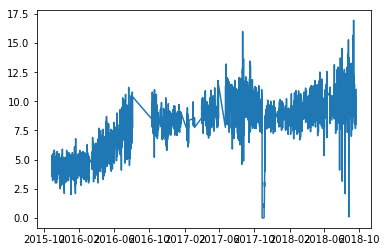

In [19]:
x = raw_data.CH4
y = raw_data['时间']
plt.plot(y,x)

In [15]:
raw_data

,时间,H2,CH4,C2H6,C2H4,C2H2,CO,CO2,O2,N2,总烃,聚类模型判别结果(0为正常点，1为异常点),分类模型判别结果(0为正常点，1为异常点)
0,2015-10-28 03:00:00,10.300,4.500,1.300,0.500,0.000,486.600,783.100,3921.500,0,6.300,0,0
1,2015-10-28 15:00:00,10.300,4.500,1.300,0.500,0.000,486.600,783.100,3921.500,0,6.300,0,0
2,2015-10-28 19:00:00,10.400,4.000,1.600,0.700,0.000,486.500,788.300,3950.200,0,6.300,0,0
3,2015-10-28 23:00:00,10.300,3.600,1.800,0.800,0.000,485.100,782.100,3921.000,0,6.200,0,0
4,2015-10-29 03:00:00,10.200,3.900,1.100,0.700,0.000,484.700,779.500,3929.300,0,5.700,0,0
5,2015-10-29 07:00:00,10.100,5.200,0.400,0.600,0.000,484.400,781.800,3936.900,0,6.200,0,0
6,2015-10-29 11:00:00,10.000,3.900,1.500,0.500,0.000,485.900,778.100,3943.900,0,5.900,0,0
7,2015-10-29 15:00:00,10.300,5.400,0.400,0.400,0.000,484.700,773.900,3939.500,0,6.200,0,0
8,2015-10-29 19:00:00,10.400,3.900,1.300,0.800,0.000,484.000,778.700,3915.800,0,6.000,0,0
9,2015-10-29 23:00:00,10.500,3.900,1.600,0.800,0.000,483.300,779.300,3930.600,0,6.300,0,0


In [9]:
CO = raw_data.pop('CO')
CO2 = raw_data.pop('CO2')
O2 = raw_data.pop('O2')
N2 = raw_data.pop('N2')
time = raw_data.pop('时间')
predicts = raw_data.pop('分类模型判别结果(0为正常点，1为异常点)')

In [10]:
raw_data['total'] = raw_data.pop('总烃')
raw_data['label'] = raw_data.pop(r'聚类模型判别结果(0为正常点，1为异常点)')

In [12]:
##------------------------------------------------------
# err_data.insert(column='H2',loc=0,value=err_data.pop('H2'))
## 新的数据集（伪）
# data = pd.concat([raw_data,err_data],sort=False)
# data = data.sample(n=data.shape[0])
# data.reset_index(drop=True).to_excel(r'监测数据异常诊断.xlsx')
##---------------------------------------------------------

In [13]:
# raw_data

In [11]:
from decimal import Decimal
def isEqual(data):
    if abs(data.CH4 + data.C2H2 +  data.C2H4 +  data.C2H6 - data.total) < 1e-1:
        return True
    else:
        return False

In [12]:
r = raw_data.apply(lambda x:isEqual(x),axis=1)

In [13]:
Counter(r)

Counter({False: 252, True: 4209})

In [14]:
error_sample = raw_data[~r].reset_index(drop=True)

In [15]:
error_sample['error'] = error_sample.CH4 + error_sample.C2H2 + error_sample.C2H4 + error_sample.C2H6 - error_sample.total 

In [16]:
abs(error_sample.error).min(),abs(error_sample.error).max()

(0.10000000000000053, 0.9510000000000005)

In [20]:
# 甲方说明：即使 总烃！=CH4 + C2H2 + C2H4 + C2H6 也不能说明设备异常
# 因此 首先按照阈值法和三比值法标注异常数据

In [17]:
# 原始监测数据中的C2H2最大值超过了阈值
raw_data.C2H2.max()

1.152

In [18]:
# 原始监测数据中的H2最大值没有超过阈值
raw_data.H2.max()

15.2

In [19]:
# 原始监测数据中的C2H2最大值超过了阈值
raw_data.C2H2.max()

1.152

In [20]:
warning_data = raw_data[raw_data.C2H2 - 0.8 > 1e-5]

In [21]:
# 三比值法诊断warning_data是否出现异常

def C2H2_C2H4(data):
    tmp = data.C2H2 / data.C2H4
    if tmp < 0.1:
        return 0
    elif tmp >= 3:
        return 2
    else:
        return 1

def CH4_H2(data):
    tmp = data.CH4 / data.H2
    if tmp < 0.1:
        return 1
    elif tmp >= 1:
        return 2
    else:
        return 0
    
def C2H4_C2H6(data):
    tmp = data.C2H4 /data.C2H6
    if tmp < 1:
        return 0
    elif tmp >= 3:
        return 2
    else:
        return 1

In [22]:
warning_data['C2H2/C2H4'] = warning_data.apply(lambda x : C2H2_C2H4(x),axis=1)
warning_data['CH4/H2'] = warning_data.apply(lambda x : CH4_H2(x),axis=1)
warning_data['C2H4/C2H6'] = warning_data.apply(lambda x : C2H4_C2H6(x),axis=1)

/Users/z/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
/Users/z/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/Users/z/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: ht

In [23]:
warning_data

,H2,CH4,C2H6,C2H4,C2H2,total,label,C2H2/C2H4,CH4/H2,C2H4/C2H6
1383,15.000,8.600,1.600,1.100,1.000,12.500,0,1,0,0
1393,14.000,8.000,1.800,1.000,1.000,11.800,0,1,0,0
1403,14.000,8.800,1.100,1.100,1.000,12.500,0,1,0,1
2546,12.000,10.771,1.369,0.501,1.000,14.240,0,1,0,0
2561,11.000,9.718,1.448,0.408,1.000,12.924,0,1,0,0
4127,6.061,11.942,0.360,0.619,0.872,13.793,0,1,2,1
4230,6.061,11.722,1.822,0.333,1.152,15.028,1,2,2,0


In [24]:
err_data[err_data.H2 == 6.061]

,CH4,H2,C2H2,C2H4,C2H6,total,label


In [30]:
Counter(raw_data.label)


Counter({0: 4454, 1: 7})

In [26]:
Counter(err_data.label)

Counter({0: 18, 1: 181})

In [27]:
raw_data.label = 0

In [28]:
raw_data[raw_data.C2H2 - 0.8 > 1e-5]

,H2,CH4,C2H6,C2H4,C2H2,total,label
1383,15.000,8.600,1.600,1.100,1.000,12.500,0
1393,14.000,8.000,1.800,1.000,1.000,11.800,0
1403,14.000,8.800,1.100,1.100,1.000,12.500,0
2546,12.000,10.771,1.369,0.501,1.000,14.240,0
2561,11.000,9.718,1.448,0.408,1.000,12.924,0
4127,6.061,11.942,0.360,0.619,0.872,13.793,0
4230,6.061,11.722,1.822,0.333,1.152,15.028,0


In [29]:
raw_data.set_value(col='label',value=1,index=raw_data[raw_data.C2H2 - 0.8 > 1e-5].index)

/Users/z/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  """Entry point for launching an IPython kernel.


,H2,CH4,C2H6,C2H4,C2H2,total,label
0,10.300,4.500,1.300,0.500,0.000,6.300,0
1,10.300,4.500,1.300,0.500,0.000,6.300,0
2,10.400,4.000,1.600,0.700,0.000,6.300,0
3,10.300,3.600,1.800,0.800,0.000,6.200,0
4,10.200,3.900,1.100,0.700,0.000,5.700,0
5,10.100,5.200,0.400,0.600,0.000,6.200,0
6,10.000,3.900,1.500,0.500,0.000,5.900,0
7,10.300,5.400,0.400,0.400,0.000,6.200,0
8,10.400,3.900,1.300,0.800,0.000,6.000,0
9,10.500,3.900,1.600,0.800,0.000,6.300,0


In [36]:
tmp = pd.concat([raw_data,err_data]).reset_index(drop=True)

In [37]:
dataset = tmp.sample(n=tmp.shape[0])

In [38]:
Counter(dataset.label)

Counter({0: 4472, 1: 188})

In [39]:
import torch
from sklearn.preprocessing import scale

In [40]:
label = dataset.pop('label')

In [41]:
dataset.insert(column='label',loc=6,value=label)

In [42]:
dataset.iloc[:,:-1] = scale(dataset.iloc[:,:-1])

In [43]:
dataset.shape[0] * 0.8

3728.0

In [44]:
tensor_train_data = torch.FloatTensor(np.array(dataset.iloc[:3728,:-1]))
tensor_train_label = torch.LongTensor(np.array(dataset.iloc[:3728,-1:]).reshape(-1))
test_x = torch.FloatTensor(np.array(dataset.iloc[3728:,:-1].reset_index(drop=True)))
test_y = torch.LongTensor(np.array(dataset.iloc[3728:,-1].reset_index(drop=True)).reshape(-1))

In [45]:
from torch.utils.data import DataLoader
import torch.utils.data as Data

In [46]:
torch_traindata = Data.TensorDataset(tensor_train_data,tensor_train_label)
train_loader = DataLoader(dataset=torch_traindata, batch_size=64, shuffle=True)

In [47]:
bp_net = torch.nn.Sequential(
    torch.nn.Linear(6,16),
    torch.nn.ReLU(),
    torch.nn.Linear(16,32),
#     torch.nn.Dropout(0.2),
    torch.nn.ReLU(),
#     torch.nn.Dropout(0.2),
    torch.nn.Linear(32,64),
#     torch.nn.Dropout(0.1),
    torch.nn.ReLU(),
#     torch.nn.Dropout(0.1),
    torch.nn.Linear(64,32),
    torch.nn.ReLU(),
    torch.nn.Linear(32,2),
#     torch.nn.Sigmoid()
)

In [48]:
def F1_Score(y_true,y_pred,beta = 2):
    precision = ((y_true==0)*(y_pred==0)).sum()/(y_pred==0).sum()
    recall = ((y_true==0)*(y_pred==0)).sum()/(y_true==0).sum()
    f1_score = float((beta**2 + 1)*precision*recall)/((beta**2)*precision + recall)
    return f1_score

In [49]:
def Accuracy(y_true,y_pred):
#     y_pred = torch.max(y_pred, 1)[1].data.numpy().squeeze()
    accuracy = float((y_pred == y_true.numpy()).astype(int).sum()) / float(y_true.numpy().size)
    return accuracy

In [50]:
optimizer = torch.optim.Adam(bp_net.parameters(),lr=0.02)
loss_func = torch.nn.CrossEntropyLoss()
f1_score = 0
# training and testing
for epoch in range(200):
#     for step, (b_x, b_y) in enumerate(train_loader):        # gives batch data
    output = bp_net(tensor_train_data)                               # rnn output
   
    loss = loss_func(output, tensor_train_label)                   # cross entropy loss
   
    optimizer.zero_grad()                           # clear gradients for this training step
    loss.backward()                                 # backpropagation, compute gradients
    optimizer.step()                                # apply gradients
    
    test_output = bp_net(test_x)
    y_pred = torch.max(test_output, 1)[1].data.numpy().squeeze()
    f = F1_Score(test_y.numpy(),y_pred)
#     break
    if f1_score < f:
        f1_score = f
        torch.save(bp_net,'bp_net.pkl')
        print(f1_score,"saving...")
    
    if epoch % 10 == 0:
#         test_output = bp_net(test_x)   # (samples, time_step, input_size)
#         y_pred = torch.max(test_output, 1)[1].data.numpy().squeeze()
        accuracy = Accuracy(test_y,y_pred)
#         f1_score = F1_Score(test_y.numpy(),y_pred)
        print('Epoch: ', epoch, '| train loss: %.4f' % loss.data.numpy(), '| test accuracy: %.4f' % accuracy,'|test f1 score:%.4f'%f1_score
             )
        
        
        
        

0.9897229669347631 saving...
Epoch:  0 | train loss: 0.5518 | test accuracy: 0.9506 |test f1 score:0.9897
0.9906082289803221 saving...
0.9932735426008971 saving...
0.994388327721661 saving...
0.9963972078360731 saving...
Epoch:  10 | train loss: 0.1717 | test accuracy: 0.9818 |test f1 score:0.9964
Epoch:  20 | train loss: 0.0439 | test accuracy: 0.9882 |test f1 score:0.9964
0.9966139954853273 saving...
0.9968390155791376 saving...
0.9970641373080399 saving...
Epoch:  30 | train loss: 0.0309 | test accuracy: 0.9957 |test f1 score:0.9971
Epoch:  40 | train loss: 0.0271 | test accuracy: 0.9957 |test f1 score:0.9971
0.9970674486803519 saving...
Epoch:  50 | train loss: 0.0633 | test accuracy: 0.9957 |test f1 score:0.9971
Epoch:  60 | train loss: 0.0575 | test accuracy: 0.9957 |test f1 score:0.9971
Epoch:  70 | train loss: 0.0339 | test accuracy: 0.9957 |test f1 score:0.9971
Epoch:  80 | train loss: 0.0255 | test accuracy: 0.9946 |test f1 score:0.9971
Epoch:  90 | train loss: 0.0233 | test 

In [51]:
# print predictions from test data
test_output = bp_net(test_x)
pred_y = torch.max(test_output, 1)[1].data.numpy().squeeze()
print(pred_y, 'prediction number' , 'length: ', len(pred_y))
print(test_y.numpy(), 'real number')

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0
 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 1 0 1 0 1 0 0 0 0 0 0 0 

In [52]:
Counter(pred_y), Counter(test_y.numpy())

(Counter({0: 885, 1: 47}), Counter({0: 886, 1: 46}))

In [53]:
# 实验结果来看，在测试集上预测错7个样本
abs(pred_y - test_y.numpy()).sum()

3

In [54]:
### 利用该模型对所有的数据整体预测
data_2_tensor = torch.FloatTensor(np.array(dataset.iloc[:,:-1]))
output = bp_net(data_2_tensor)
predicts = torch.max(output, 1)[1].data.numpy().squeeze()

In [55]:
Counter(predicts),Counter(dataset.label)

(Counter({0: 4479, 1: 181}), Counter({0: 4472, 1: 188}))

In [56]:
dataset['predict'] = predicts

In [57]:
dataset

,C2H2,C2H4,C2H6,CH4,H2,total,label,predict
1498,-0.020378,-0.032514,-0.048092,-0.036950,-0.028998,-0.045212,0,0
3182,-0.020378,-0.038391,-0.048112,-0.037812,-0.040325,-0.046125,0,0
1598,-0.020019,-0.033230,-0.048313,-0.037715,-0.030879,-0.045368,0,0
3770,-0.020378,-0.039371,-0.049941,-0.032434,-0.046866,-0.045093,0,0
1600,-0.020378,-0.034661,-0.047207,-0.036950,-0.031114,-0.045133,0,0
1507,-0.020378,-0.033230,-0.048755,-0.034655,-0.028058,-0.044821,0,0
647,-0.020378,-0.036809,-0.048977,-0.048170,-0.034405,-0.049436,0,0
3407,-0.020378,-0.038040,-0.048645,-0.037264,-0.042164,-0.046107,0,0
3903,-0.020378,-0.038749,-0.049167,-0.034291,-0.049217,-0.045457,0,0
4577,0.546786,0.152159,1.150055,0.994499,0.357503,1.085294,1,1


In [60]:
tmp['predict'] = dataset.sort_index().predict

In [62]:
tmp

,C2H2,C2H4,C2H6,CH4,H2,label,total,predict
0,0.00,0.50,1.30,4.50,10.30,0,6.30,0
1,0.00,0.50,1.30,4.50,10.30,0,6.30,0
2,0.00,0.70,1.60,4.00,10.40,0,6.30,0
3,0.00,0.80,1.80,3.60,10.30,0,6.20,0
4,0.00,0.70,1.10,3.90,10.20,0,5.70,0
5,0.00,0.60,0.40,5.20,10.10,0,6.20,0
6,0.00,0.50,1.50,3.90,10.00,0,5.90,0
7,0.00,0.40,0.40,5.40,10.30,0,6.20,0
8,0.00,0.80,1.30,3.90,10.40,0,6.00,0
9,0.00,0.80,1.60,3.90,10.50,0,6.30,0


In [63]:
tmp.insert(column='label',value=tmp.pop('label'),loc=6)

In [64]:
tmp.reset_index(drop=True).to_excel(r'8111B换流变A相预测结果.xlsx')